In [1]:
plotpars_hmp = {'axes.labelsize': 22,
                'axes.linewidth': 1.,
                'figure.figsize': (10.,8.),
                'font.size': 11,
                'legend.frameon': True,
                'legend.framealpha': 0.85,
                'legend.edgecolor': 'black',
                'legend.loc': 'best',
                'legend.fontsize': 15,
                'mathtext.fontset': 'stixsans',
                'savefig.bbox': 'tight',
                'xtick.labelsize': 22,
                'ytick.labelsize': 22,
               }

plotpars_1x2 = {'axes.labelsize': 22,
                'axes.linewidth': 1.,
                'figure.figsize': (10.,5.),
                'font.size': 10,
                'legend.frameon': True,
                'legend.framealpha': 0.85,
                'legend.edgecolor': 'black',
                'legend.loc': 'best',
                'legend.fontsize': 15,
                'mathtext.fontset': 'stixsans',
                'savefig.bbox': 'tight',
                'xtick.labelsize': 22,
                'ytick.labelsize': 22,
               }

In [2]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import pystan
import arviz
import time
import os

In [3]:
results_path = '../../LargeFilesResults/COLOURS/'

In [4]:
data = pd.read_csv('../../Catalogue/Match08c_smallemlines_sersicDR2.csv')

In [27]:
data[data['UV_CLASS_YI2011']=='RSF'].describe()

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,GAL_INDEX_K,GAL_ELLIP_K,GAL_PA_K,GAL_XCEN_ERR_K,GAL_YCEN_ERR_K,GAL_MAG_ERR_K,GAL_RE_ERR_K,GAL_INDEX_ERR_K,GAL_ELLIP_ERR_K,GAL_PA_ERR_K
count,8195.000000,8.195000e+03,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,...,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8.195000e+03
mean,310366.153630,5.880294e+17,183.543645,-8.417531,-4.979999,-3.407136,14.265574,-5.921316,-7.080049,11.195381,...,-289.317120,-291.188909,-203.959310,-313.952642,-315.119490,-314.331289,-312.876259,-315.260968,-315.945086,1.436799e+02
std,204023.062084,4.969531e+14,299.288044,292.133291,292.231437,292.277778,293.051805,292.617156,292.171799,292.719136,...,1682.997542,1682.671669,1698.578717,1772.218789,1758.358548,1760.142574,1764.461933,1754.980061,1754.253913,2.630534e+04
min,6806.000000,5.877230e+17,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9.999000e+03
25%,99445.000000,5.877247e+17,178.012550,-0.901080,3.500000,4.620000,20.365600,0.042100,0.000000,19.332050,...,1.049000,0.251700,40.578050,0.040000,0.030000,0.030000,0.047460,0.150000,0.030000,2.210000e+00
50%,296861.000000,5.877260e+17,212.093500,0.070615,3.500000,5.280000,20.771800,0.061200,2.000000,19.640700,...,1.680700,0.408700,87.991300,0.060000,0.060000,0.050000,0.091530,0.260000,0.040000,4.350000e+00
75%,511434.000000,5.888489e+17,218.234550,1.137470,3.500000,5.280000,21.259550,0.100350,2.000000,19.966700,...,2.818750,0.587900,135.579250,0.110000,0.110000,0.080000,0.186450,0.500000,0.060000,8.560000e+00
max,750477.000000,5.888489e+17,223.498200,2.999892,8.070000,10.560000,99.000000,99.000000,19.000000,99.000000,...,19.999900,0.983000,179.995100,23340.690000,12115.390000,12814.410000,16037.991690,7350.550000,5151.530000,2.232212e+06


In [28]:
data[data['UV_CLASS_YI2011']=='UV_UPTURN'].describe()

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,GAL_INDEX_K,GAL_ELLIP_K,GAL_PA_K,GAL_XCEN_ERR_K,GAL_YCEN_ERR_K,GAL_MAG_ERR_K,GAL_RE_ERR_K,GAL_INDEX_ERR_K,GAL_ELLIP_ERR_K,GAL_PA_ERR_K
count,174.000000,1.740000e+02,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,290885.689655,5.880193e+17,178.255001,0.394130,3.587414,4.949655,28.916526,9.860815,1.804598,19.531602,...,-226.088744,-229.444839,-144.515530,-344.764080,-344.763736,-344.749770,-344.690936,-344.244598,-344.764023,-340.512586
std,196113.230019,4.923647e+14,31.787978,1.185152,0.257594,0.514743,23.142840,29.421238,0.897512,0.449158,...,1503.423912,1502.906289,1516.911515,1829.744559,1829.744624,1829.747271,1829.758425,1829.843537,1829.744570,1830.556494
min,6840.000000,5.877230e+17,129.347500,-1.785960,3.500000,3.500000,19.447200,0.034000,0.000000,18.106600,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,100670.500000,5.877247e+17,139.816150,-0.558980,3.500000,4.620000,20.825875,0.063825,2.000000,19.222500,...,2.465150,0.221150,37.574150,0.020000,0.020000,0.030000,0.040680,0.230000,0.020000,1.417500
50%,281552.500000,5.877260e+17,180.551600,0.375307,3.500000,4.620000,21.189300,0.109000,2.000000,19.529600,...,3.556300,0.390150,78.795150,0.030000,0.030000,0.040000,0.064410,0.370000,0.030000,2.800000
75%,480405.750000,5.888489e+17,213.268825,1.356714,3.537500,5.280000,22.088025,0.196375,2.000000,19.855275,...,4.543000,0.577300,131.738875,0.030000,0.030000,0.050000,0.125430,0.585000,0.040000,5.415000
max,622552.000000,5.888489e+17,223.497600,2.959534,5.830000,6.600000,99.000000,99.000000,3.000000,20.879300,...,19.993500,0.949400,179.854700,0.090000,0.220000,0.420000,1.054290,18.190000,0.090000,31.720000


In [29]:
data[data['UV_CLASS_YI2011']=='UV_WEAK'].describe()

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,GAL_INDEX_K,GAL_ELLIP_K,GAL_PA_K,GAL_XCEN_ERR_K,GAL_YCEN_ERR_K,GAL_MAG_ERR_K,GAL_RE_ERR_K,GAL_INDEX_ERR_K,GAL_ELLIP_ERR_K,GAL_PA_ERR_K
count,231.000000,2.310000e+02,231.000000,231.000000,231.00000,231.000000,231.000000,231.000000,231.000000,231.000000,...,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,296883.978355,5.880282e+17,184.551481,0.128036,3.55316,4.856883,24.918535,4.857902,1.649351,19.363315,...,-385.562229,-389.149887,-301.848606,-447.823636,-453.846710,-475.039264,-462.807536,-423.264156,-423.054199,752.400130
std,199479.299783,4.985422e+14,30.326909,1.187535,0.14489,0.512865,16.623768,21.097852,0.992575,0.480620,...,1939.840342,1939.114509,1957.426989,2183.099312,2165.600522,2134.306930,2145.997074,2287.440159,2292.391958,18756.541852
min,7371.000000,5.877230e+17,129.296100,-1.949834,3.50000,3.500000,18.527800,0.015800,0.000000,16.776700,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,106476.500000,5.877247e+17,175.886600,-0.868764,3.50000,4.620000,20.688600,0.057550,2.000000,19.045450,...,2.423850,0.249500,45.159550,0.020000,0.020000,0.020000,0.035595,0.225000,0.020000,1.285000
50%,272688.000000,5.877260e+17,182.379700,-0.055015,3.50000,4.620000,21.089000,0.087100,2.000000,19.353200,...,3.612200,0.409800,87.711800,0.030000,0.030000,0.040000,0.067800,0.390000,0.030000,2.670000
75%,508801.000000,5.888489e+17,215.154200,1.178886,3.50000,5.280000,21.741850,0.163500,2.000000,19.721200,...,4.912950,0.590450,138.754150,0.035000,0.030000,0.050000,0.122040,0.650000,0.040000,4.920000
max,663510.000000,5.888489e+17,223.487800,2.771706,4.52000,6.600000,99.000000,99.000000,3.000000,20.524300,...,19.999600,0.955100,179.535500,6535.160000,5143.980000,243.260000,2985.678090,12043.710000,12256.720000,282748.620000


In [34]:
uv_upturn_rp

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,GAL_INDEX_K,GAL_ELLIP_K,GAL_PA_K,GAL_XCEN_ERR_K,GAL_YCEN_ERR_K,GAL_MAG_ERR_K,GAL_RE_ERR_K,GAL_INDEX_ERR_K,GAL_ELLIP_ERR_K,GAL_PA_ERR_K
84,594994,588848899931439415,222.9286,-0.152468,3.5,4.62,20.6537,0.0385,2,19.4048,...,0.2720,0.3732,162.5497,0.04,0.04,0.01,0.01695,0.08,0.03,3.98
136,600232,588848900429578535,134.3863,0.325479,3.5,4.62,22.1271,0.1172,0,19.6814,...,2.1244,0.6522,95.9705,0.03,0.04,0.02,0.03390,0.32,0.03,1.95
202,609836,588848900448452756,177.4558,0.352174,3.5,4.62,21.1312,0.0543,2,19.1966,...,3.8056,0.6678,173.5934,0.02,0.02,0.02,0.05424,0.23,0.01,0.71
212,610293,588848900449370284,179.6213,0.360711,3.5,5.28,21.0113,0.0503,0,19.4856,...,2.1661,0.6058,37.3556,0.02,0.02,0.02,0.01695,0.17,0.02,1.08
227,610441,588848900449632462,180.2054,0.211046,3.5,4.62,99.0000,99.0000,2,19.6212,...,3.2520,0.4191,166.6292,0.02,0.02,0.02,0.02373,0.26,0.02,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7630,196998,587725073915838996,133.5570,-0.744493,3.5,4.62,22.0491,0.1531,3,19.8998,...,19.9935,0.4791,4.2645,0.09,0.10,0.42,1.05429,18.19,0.09,7.43
7706,203412,587725074452775445,133.7558,-0.221677,3.5,4.62,99.0000,99.0000,2,19.8237,...,3.8707,0.1399,166.6054,0.03,0.03,0.06,0.07797,0.51,0.04,10.75
7721,203848,587725074453561685,135.5586,-0.257020,3.5,3.96,22.4878,0.2091,2,19.6598,...,1.3978,0.4094,5.5967,0.04,0.03,0.03,0.04746,0.10,0.02,2.21
8397,238896,587726014547624265,215.5956,1.718073,3.5,5.28,99.0000,99.0000,0,19.4530,...,3.5473,0.7419,90.1280,0.02,0.03,0.03,0.10170,0.23,0.01,0.63


In [5]:
rgs           = data[data['UV_CLASS_YI2011']!='RSF']
rsf_all       = data[data['UV_CLASS_YI2011']=='RSF']
uv_upturn_all = data[data['UV_CLASS_YI2011']=='UV_UPTURN']
uv_weak_all   = data[data['UV_CLASS_YI2011']=='UV_WEAK']

In [6]:
uv_upturn_rp  = uv_upturn_all[uv_upturn_all['WHAN_CLASS']=='Retired/Passive']
uv_upturn_rp  = uv_upturn_rp[uv_upturn_rp['SEX_INDEX_H']!=-9999.00]

uv_weak_rp  = uv_weak_all[uv_weak_all['WHAN_CLASS']=='Retired/Passive']
uv_weak_rp  = uv_weak_rp[uv_weak_rp['SEX_INDEX_H']!=-9999.00]

In [7]:
uv_upturn_na  = uv_upturn_all[uv_upturn_all['WHAN_CLASS'].isnull()]
uv_upturn_na  = uv_upturn_na[uv_upturn_na['SEX_INDEX_H']!=-9999.00]

uv_weak_na  = uv_weak_all[uv_weak_all['WHAN_CLASS'].isnull()]
uv_weak_na  = uv_weak_na[uv_weak_na['SEX_INDEX_H']!=-9999.00]

In [8]:
uv_upturn     = pd.concat((uv_upturn_na, uv_upturn_rp)) # combination of retired/passive + non measured ELs
uv_weak       = pd.concat((uv_weak_na, uv_weak_rp)) # combination of retired/passive + non measured ELs

In [9]:
uv_weak_na

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,GAL_INDEX_K,GAL_ELLIP_K,GAL_PA_K,GAL_XCEN_ERR_K,GAL_YCEN_ERR_K,GAL_MAG_ERR_K,GAL_RE_ERR_K,GAL_INDEX_ERR_K,GAL_ELLIP_ERR_K,GAL_PA_ERR_K
538,621993,588848900964483414,129.8609,0.711663,3.53,3.96,20.7999,0.0464,2,19.4775,...,15.3800,0.3845,145.5747,0.04,0.04,0.26,1.44753,6.44,0.06,5.14
973,23235,588848901523636381,180.7944,1.235119,3.58,4.62,20.6207,0.0461,0,19.0978,...,5.4271,0.4241,38.2176,0.03,0.03,0.07,0.16272,0.82,0.03,3.00
1321,273306,587726031176138896,183.0068,1.332596,3.50,4.62,22.5361,0.2530,0,20.4543,...,0.3167,0.8301,138.1191,0.03,0.03,0.01,0.02712,0.18,0.05,2.84
1522,289494,587726031712747723,182.3944,1.742005,3.50,4.62,20.4712,0.0560,2,19.4549,...,2.6897,0.1355,51.9474,0.04,0.04,0.04,0.04746,0.36,0.05,12.37
1524,289570,587726031712878779,182.7482,1.838380,3.50,5.28,99.0000,99.0000,2,20.1114,...,4.4895,0.3780,128.3544,0.02,0.02,0.05,0.06441,0.58,0.03,3.11
2036,320155,587726032264823015,217.2517,1.824714,3.50,4.62,20.9185,0.0833,2,19.3428,...,5.6306,0.1414,0.9082,0.03,0.03,0.05,0.08475,0.73,0.04,9.36
3059,486350,587729777983422754,219.6860,-1.807401,3.73,5.28,20.8717,0.1020,2,19.2147,...,3.6543,0.5033,19.9338,0.06,0.04,0.08,0.31866,0.50,0.03,2.67
3460,504997,587729971250463021,218.1798,-1.949834,3.50,4.62,20.7319,0.0432,2,18.9844,...,2.0796,0.4676,32.3843,0.01,0.02,0.01,0.01356,0.21,0.02,1.90
3510,505829,587729971252101381,221.9371,-1.924276,3.59,3.96,21.5518,0.1104,3,19.7218,...,2.1137,0.5899,149.8140,0.03,0.02,0.02,0.02712,0.25,0.03,1.75
3543,506120,587729971252691185,223.2645,-1.770228,3.50,3.96,20.1648,0.0359,3,18.7915,...,2.5185,0.6787,172.3826,0.05,0.04,0.03,0.07119,0.30,0.02,1.37


In [10]:
# for i in uv_upturn.keys():
#     print(i)

In [11]:
colours_up = {}
colours_up['CATAID']      = uv_upturn['CATAID'].values
colours_up['FUV-NUV']     = uv_upturn['MAG_AB_FUV'].values - uv_upturn['MAG_AB_NUV'].values
colours_up['FUV-R']       = uv_upturn['MAG_AB_FUV'].values - uv_upturn['MAG_AB_R'].values
colours_up['NUV-R']       = uv_upturn['MAG_AB_NUV'].values - uv_upturn['MAG_AB_R'].values
colours_up['U-G']         = uv_upturn['MAG_AB_U'].values - uv_upturn['MAG_AB_G'].values
colours_up['G-R']         = uv_upturn['MAG_AB_G'].values - uv_upturn['MAG_AB_R'].values
colours_up['R-I']         = uv_upturn['MAG_AB_R'].values - uv_upturn['MAG_AB_I'].values
colours_up['I-Z']         = uv_upturn['MAG_AB_I'].values - uv_upturn['MAG_AB_Z'].values
# colours_up['GAL_INDEX_H'] = uv_upturn['GAL_INDEX_H'] #sextractor is better than galfit
colours_up['SEX_INDEX_R'] = uv_upturn['SEX_INDEX_R']
colours_up['SEX_INDEX_H'] = uv_upturn['SEX_INDEX_H']
colours_up['redshift']    = uv_upturn['Z']
colours_up['logmstar']    = uv_upturn['logmstar']
colours_up = pd.DataFrame(colours_up)

In [12]:
heatmap_up = colours_up.drop(['CATAID'], axis=1)

In [13]:
colours_wk = {}
colours_wk['CATAID']      = uv_weak['CATAID'].values
colours_wk['FUV-NUV']     = uv_weak['MAG_AB_FUV'].values - uv_weak['MAG_AB_NUV'].values
colours_wk['FUV-R']       = uv_weak['MAG_AB_FUV'].values - uv_weak['MAG_AB_R'].values
colours_wk['NUV-R']       = uv_weak['MAG_AB_NUV'].values - uv_weak['MAG_AB_R'].values
colours_wk['U-G']         = uv_weak['MAG_AB_U'].values - uv_weak['MAG_AB_G'].values
colours_wk['G-R']         = uv_weak['MAG_AB_G'].values - uv_weak['MAG_AB_R'].values
colours_wk['R-I']         = uv_weak['MAG_AB_R'].values - uv_weak['MAG_AB_I'].values
colours_wk['I-Z']         = uv_weak['MAG_AB_I'].values - uv_weak['MAG_AB_Z'].values
# colours_wk['GAL_INDEX_H'] = uv_weak['GAL_INDEX_H'] #sextractor is better than galfit
colours_wk['SEX_INDEX_R'] = uv_weak['SEX_INDEX_R']
colours_wk['SEX_INDEX_H'] = uv_weak['SEX_INDEX_H']
colours_wk['redshift']    = uv_weak['Z']
colours_wk['logmstar']    = uv_weak['logmstar']
colours_wk = pd.DataFrame(colours_wk)

In [14]:
heatmap_wk = colours_wk.drop(['CATAID'], axis=1)

In [15]:
colours_all = {}
colours_all['CATAID']      = data['CATAID'].values
colours_all['FUV-NUV']     = data['MAG_AB_FUV'].values - data['MAG_AB_NUV'].values
colours_all['FUV-R']       = data['MAG_AB_FUV'].values - data['MAG_AB_R'].values
colours_all['NUV-R']       = data['MAG_AB_NUV'].values - data['MAG_AB_R'].values
colours_all['U-G']         = data['MAG_AB_U'].values - data['MAG_AB_G'].values
colours_all['G-R']         = data['MAG_AB_G'].values - data['MAG_AB_R'].values
colours_all['R-I']         = data['MAG_AB_R'].values - data['MAG_AB_I'].values
colours_all['I-Z']         = data['MAG_AB_I'].values - data['MAG_AB_Z'].values
# colours_all['GAL_INDEX_H'] = data['GAL_INDEX_H'] #sextractor is better than galfit
colours_all['SEX_INDEX_R'] = data['SEX_INDEX_R']
colours_all['SEX_INDEX_H'] = data['SEX_INDEX_H']
colours_all['redshift']    = data['Z']
colours_all['logmstar']    = data['logmstar']
colours_all = pd.DataFrame(colours_all)

In [16]:
heatmap_all = colours_all.drop(['CATAID'], axis=1)

In [17]:
cmap = sns.diverging_palette(179, 40, n=10)
# cmap = sns.diverging_palette(150, 50, n=10)

In [18]:
labels= (['FUV-NUV', r"FUV-$r$", r"NUV-$r$", r"$u-g$", r"$g-r$", r"$r-i$", r"$i-z$", r"$n_{r}$", r"$n_{\rm{H}}$", 
          r"$z$", r"$\logM_{\star}}$"])

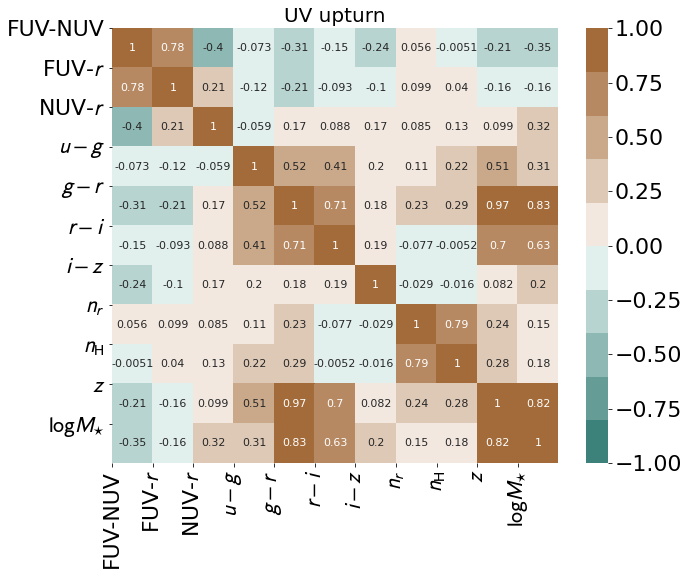

In [19]:
plt.rcParams.update(plotpars_hmp)
plt.title("UV upturn", fontsize=20)
sns.heatmap(heatmap_up.corr(method='spearman'), cmap=cmap, vmin=-1, vmax=1, annot=True)
plt.xticks(ticks=np.arange(0,11,1), labels = labels)
plt.yticks(ticks=np.arange(0,11,1), labels = labels)
plt.savefig(os.path.join(results_path, 'heatmap_colours_up.pdf'))
plt.savefig(os.path.join(results_path, 'heatmap_colours_up.png'))
plt.show()

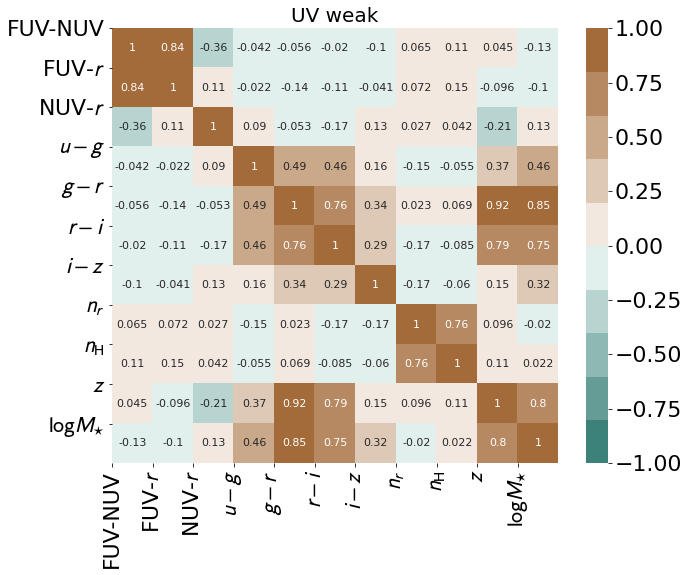

In [20]:
plt.rcParams.update(plotpars_hmp)
plt.title("UV weak", fontsize=20)
sns.heatmap(heatmap_wk.corr(method='spearman'), cmap=cmap, vmin=-1, vmax=1, annot=True)
plt.xticks(ticks=np.arange(0,11,1), labels = labels)
plt.yticks(ticks=np.arange(0,11,1), labels = labels)
plt.savefig(os.path.join(results_path, 'heatmap_colours_wk.pdf'))
plt.savefig(os.path.join(results_path, 'heatmap_colours_wk.png'))
plt.show()

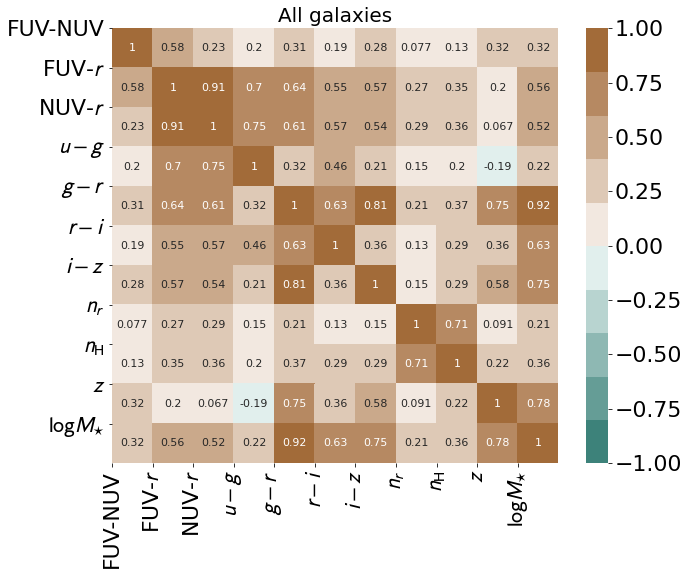

In [21]:
plt.rcParams.update(plotpars_hmp)
plt.title("All galaxies", fontsize=20)
sns.heatmap(heatmap_all.corr(method='spearman'), cmap=cmap, vmin=-1, vmax=1, annot=True)
plt.xticks(ticks=np.arange(0,11,1), labels = labels)
plt.yticks(ticks=np.arange(0,11,1), labels = labels)
plt.savefig(os.path.join(results_path, 'heatmap_colours_all.pdf'))
plt.savefig(os.path.join(results_path, 'heatmap_colours_all.png'))
plt.show()

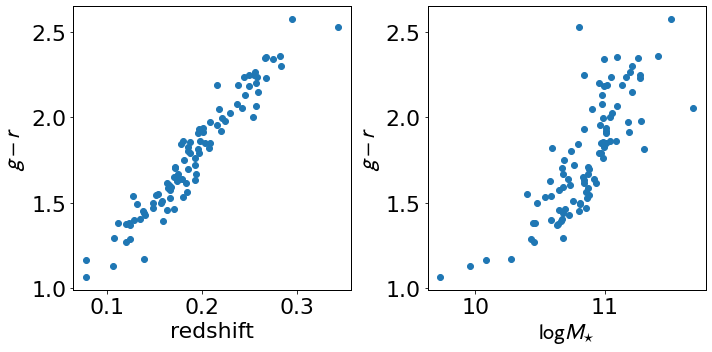

In [22]:
plt.rcParams.update(plotpars_1x2)
plt.subplot(1, 2, 1)
plt.scatter(colours_up['redshift'], colours_up['G-R'], marker='o')
plt.xlabel(r"redshift")
plt.ylabel(r"$g-r$")

plt.subplot(1, 2, 2)
plt.scatter(colours_up['logmstar'], colours_up['G-R'], marker='o')
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel(r"$g-r$")

plt.tight_layout()
plt.show()

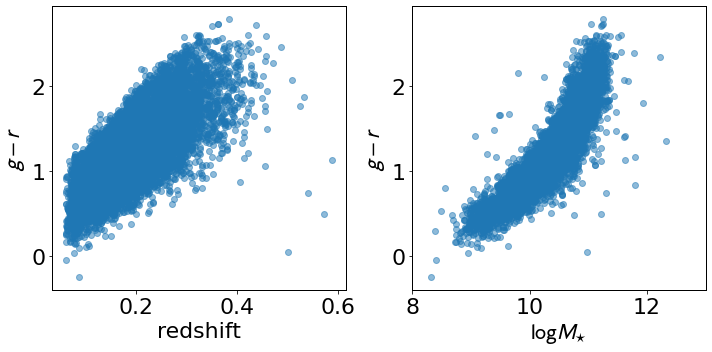

In [23]:
plt.rcParams.update(plotpars_1x2)
plt.subplot(1, 2, 1)
plt.scatter(data['Z'], data['MAG_AB_G']-data['MAG_AB_R'], marker='o', alpha=0.5)
plt.xlabel(r"redshift")
plt.ylabel(r"$g-r$")

plt.subplot(1, 2, 2)
plt.scatter(data['logmstar'], data['MAG_AB_G']-data['MAG_AB_R'], marker='o', alpha=0.5)
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel(r"$g-r$")
plt.xlim([8,13])

plt.tight_layout()
plt.show()

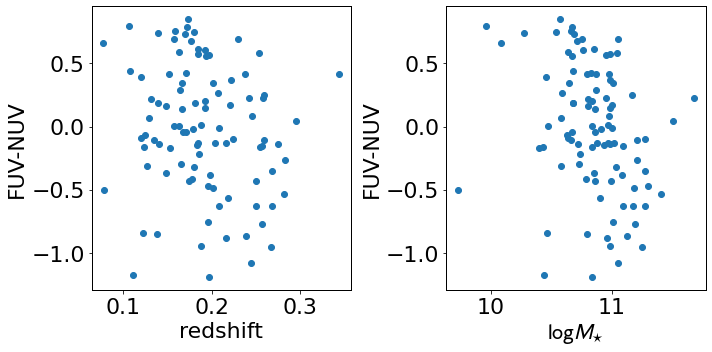

In [24]:
plt.rcParams.update(plotpars_1x2)
plt.subplot(1, 2, 1)
plt.scatter(colours_up['redshift'], colours_up['FUV-NUV'], marker='o')
plt.xlabel(r"redshift")
plt.ylabel(r"FUV-NUV")

plt.subplot(1, 2, 2)
plt.scatter(colours_up['logmstar'], colours_up['FUV-NUV'], marker='o')
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel(r"FUV-NUV")

plt.tight_layout()
plt.show()

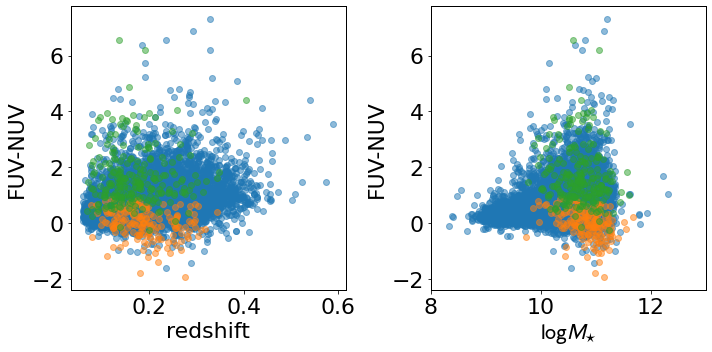

In [25]:
plt.rcParams.update(plotpars_1x2)
plt.subplot(1, 2, 1)
plt.scatter(rsf_all['Z'], rsf_all['MAG_AB_FUV']-rsf_all['MAG_AB_NUV'], marker='o', alpha=0.5)
plt.scatter(uv_upturn_all['Z'], uv_upturn_all['MAG_AB_FUV']-uv_upturn_all['MAG_AB_NUV'], marker='o', alpha=0.5)
plt.scatter(uv_weak_all['Z'], uv_weak_all['MAG_AB_FUV']-uv_weak_all['MAG_AB_NUV'], marker='o', alpha=0.5)
plt.xlabel(r"redshift")
plt.ylabel(r"FUV-NUV")

plt.subplot(1, 2, 2)
plt.scatter(rsf_all['logmstar'], rsf_all['MAG_AB_FUV']-rsf_all['MAG_AB_NUV'], marker='o', alpha=0.5)
plt.scatter(uv_upturn_all['logmstar'], uv_upturn_all['MAG_AB_FUV']-uv_upturn_all['MAG_AB_NUV'], marker='o', 
            alpha=0.5)
plt.scatter(uv_weak_all['logmstar'], uv_weak_all['MAG_AB_FUV']-uv_weak_all['MAG_AB_NUV'], marker='o', 
            alpha=0.5)
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel(r"FUV-NUV")
plt.xlim([8,13])

plt.tight_layout()
plt.show()